<a href="https://colab.research.google.com/github/carvalheirafc/mnist-deeplearning/blob/main/mnist_data_handler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Section

In [1]:
import numpy as np
import struct as st
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings("ignore")

# Download and Converting Area

In [3]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2020-10-28 21:14:14--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  12.3MB/s    in 0.8s    

2020-10-28 21:14:15 (12.3 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-10-28 21:14:15--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 172.67.171.76, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB

In [4]:
!gzip -d /content/train-images-idx3-ubyte.gz
!gzip -d /content/train-labels-idx1-ubyte.gz

In [5]:
trainingfilenames = {'images' : '/content/train-images-idx3-ubyte' ,'labels' : '/content/train-labels-idx1-ubyte'}

In [6]:
for name in trainingfilenames.keys():
	if name == 'images':
		train_imagesfile = open(trainingfilenames[name],'rb')
	if name == 'labels':
		train_labelsfile = open(trainingfilenames[name],'rb')

In [7]:
train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))

train_imagesfile.seek(4)
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of columns
train_labelsfile.seek(8)

labels = np.asarray(st.unpack('>'+'B'*nImg,train_labelsfile.read(nImg*1))).reshape((nImg,1))

nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
samples = np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))


In [8]:
print('Labels Array Format: ', labels.shape)
print('Samples Array Format: ', samples.shape)


Labels Array Format:  (60000, 1)
Samples Array Format:  (60000, 28, 28)


# Separating Classes

In [9]:
data_X = np.array(samples).reshape([60000, 1, 28, 28])

In [10]:
def class_arrays(index):
  return data_X[labels==index], labels[labels==index]

In [11]:
separeted_classes_dictionary = {0: [], 1: [], 
                                2: [], 3: [],
                                4: [], 5: [],
                                6: [], 7: [],
                                8: [], 9: []}

for it in range(10):
  separeted_classes_dictionary[it] = class_arrays(it)

# Data Exploration


### Mean of each Class

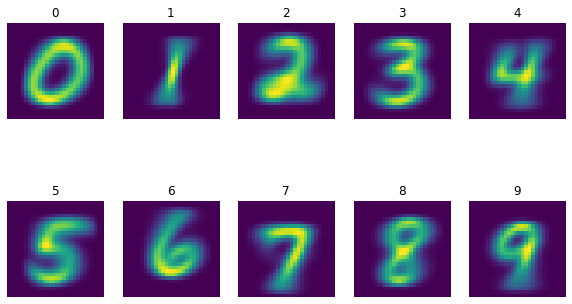

In [12]:
fig = plt.figure(figsize=(10, 6))
for it in range(10):
  plt.subplot(2, 5, it+1)
  plt.axis('off')
  plt.title(it)
  plt.imshow(separeted_classes_dictionary[it][0].mean(axis=0).squeeze())

### Histogram of each class

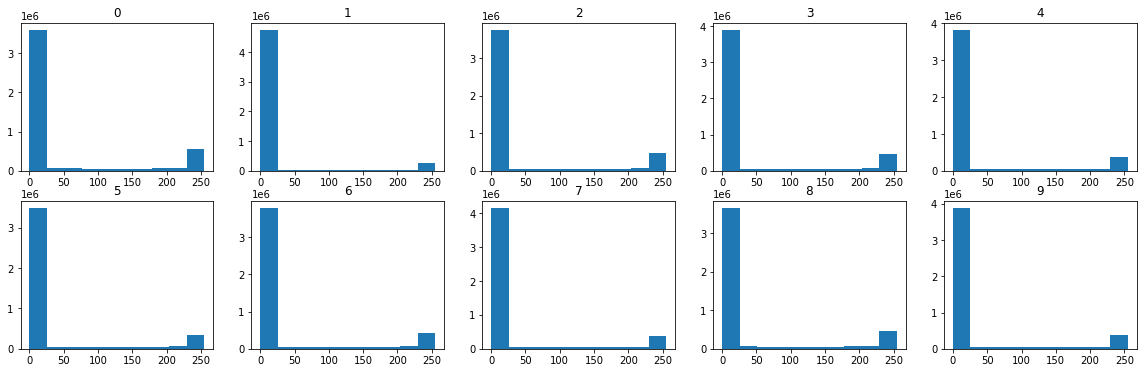

In [13]:
fig = plt.figure(figsize=(20, 6))
for it in range(10):
  plt.subplot(2, 5, it+1) 
  plt.hist(separeted_classes_dictionary[it][0].reshape(-1))
  plt.title(it)

### PCA Tranformation 


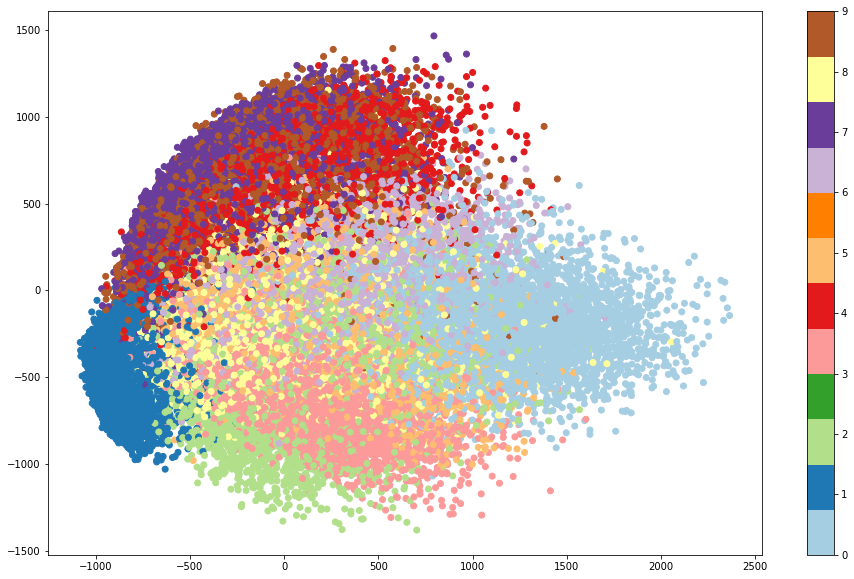

In [14]:
fig = plt.figure(figsize=(16, 10))

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_X.reshape(-1, 784))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='Paired')
plt.colorbar(ticks=range(10))

# Reducing the original data

### Samples Reduction


In [15]:
X_train_half, X_test_half, y_train_half, y_test_half = train_test_split(data_X, labels, stratify=labels, random_state=55, test_size=0.5)

In [16]:
X_train_smaller, X_test_smaller, y_train_smaller, y_test_smaller = train_test_split(data_X, labels, stratify=labels, random_state=55, test_size=0.8)

In [17]:
print('Redução de dimensão no numero de amostras \n')
print('Tamanho Original ===> ', data_X.shape[0])
print('Metade do data-set para treino ===> ', X_train_half.shape[0])
print('Vinte por cento do data-set para treino ===> ', X_train_smaller.shape[0])

Redução de dimensão no numero de amostras 

Tamanho Original ===>  60000
Metade do data-set para treino ===>  30000
Vinte por cento do data-set para treino ===>  12000


### Classes Reduction

In [18]:
two_classes_data = separeted_classes_dictionary[0], separeted_classes_dictionary[1]
print('Tamanho Total Conjunto duas classes ===>', two_classes_data[0][0].shape[0] + two_classes_data[1][0].shape[0])

Tamanho Total Conjunto duas classes ===> 12665


In [19]:
np.save('mnist_X', data_X)
np.save('mnist_labels', labels)

In [20]:
np.save('X_train_half', X_train_half)
np.save('y_train_half', y_train_half)
np.save('X_test_half', X_test_half)
np.save('y_test_half', y_test_half)

In [21]:
np.save('X_train_smaller', X_train_smaller)
np.save('y_train_smaller', y_train_smaller)
np.save('X_test_smaller', X_test_smaller)
np.save('y_test_smaller', y_test_smaller)

In [22]:
np.save('two_classes_data', two_classes_data)